In [1]:
import csv
import numpy as np #We will make extensive use of Numpy arrays 
from astropy.time import Time

import math #needed to check for NaNs

import matplotlib  #ploting
matplotlib.use("Agg")  #some hack to stop the bouncing python icon when plotting of os/x
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm #for better display of FITS images
import time as t
%matplotlib inline

In [2]:
toi_file='toi-2019-08-06.csv'

In [3]:
tzero=2457000

In [4]:
tidid=[]
toiid=[]
ra=[]
dec=[]
tmag=[]
t0=[]
t0err=[]
per=[]
pererr=[]
tdur=[]
tdurerr=[]
tdep=[]
tdeperr=[]
with open(toi_file, newline='') as csvfile:
    csvdata = csv.reader(csvfile, delimiter=',')
    i=0
    for row in csvdata:
        i=i+1
        if i > 1 and row[9]!='' and row[10]!='' and row[11]!='' and row[15]!='':
            tidid.append(float(row[1]))
            toiid.append(float(row[2]))
            ra.append(float(row[4]))
            dec.append(float(row[5]))
            tmag.append(float(row[6]))
            t0.append(float(row[8])+2457000.0)
            t0err.append(float(row[9]))
            per.append(float(row[10]))
            pererr.append(float(row[11]))
            tdur.append(float(row[12]))
            tdurerr.append(float(row[13]))
            tdep.append(float(row[14]))
            tdeperr.append(float(row[15]))
tdep=np.array(tdep)

In [5]:
t = Time(t0, format='jd', scale='tcb')

In [6]:
tnow = Time(['2019-08-01 00:00:00','2019-10-31 00:00:00'], format='iso', scale='utc')

In [7]:
print(t.utc.iso[1])
print(tnow.jd)

2019-02-03 18:26:12.556
[2458696.5 2458787.5]


In [8]:
#Noise predictions
medexptime=4.0012
zmag=21.96
gain=1.1
photap=3.0
readnoise=8.0

In [24]:
f=open('TESS_20190813.csv','w')
file=csv.writer(f,delimiter='|')
file.writerow(['TOI','Mid Time','Start Time','End Time','Ingress Start','Ingress End'\
               ,'Egress Start','Egress End'])

nstar=len(t0)
sortidx=np.argsort(toiid)
txplot=[]
typlot=[]
#for i in range(nstar):
for i in sortidx[:]:
    meanf=np.power(10,(zmag-tmag[i])/2.5)*medexptime
    shotnoise=np.sqrt(meanf*gain)/(meanf*gain)
    detectnoise=np.sqrt(np.pi*photap*photap)*(readnoise+0.2*medexptime+1.05*medexptime)/(meanf*gain)
    predictnoise=np.sqrt(shotnoise*shotnoise+detectnoise*detectnoise)/np.sqrt(150)
    
    if tdep[i]/1.0e6 > 8.0 * predictnoise and tmag[i] < 11:
        print(toiid[i],tmag[i],predictnoise,tdep[i]/1.0e6)
        txplot.append(tmag[i])
        typlot.append(tdep[i]/1.0e6)
        
        n_start=int((tnow.jd[0]-t.jd[i])/per[i]+1)
        n_finish=int((tnow.jd[1]-t.jd[i])/per[i]+1)
        tmid=[]
        tstart=[]
        tend=[]
        ting_start=[]
        ting_end=[]
        teg_start=[]
        teg_end=[]
        for j in range(n_start,n_finish):
            tmid.append(t0[i]+j*per[i])
            tstart.append(t0[i]+j*per[i]-tdur[i]/24.0/1.0-t0err[i])
            tend.append(t0[i]+j*per[i]+tdur[i]/24.0/1.0+t0err[i])
            ting_start.append(t0[i]+j*per[i]-tdur[i]/24.0/2.0-t0err[i])
            ting_end.append(t0[i]+j*per[i]-tdur[i]/24.0/2.0+t0err[i])
            teg_start.append(t0[i]+j*per[i]+tdur[i]/24.0/2.0-t0err[i])
            teg_end.append(t0[i]+j*per[i]+tdur[i]/24.0/2.0+t0err[i])
        tmid_times=Time(tmid, format='jd', scale='tcb')
        tstart_times=Time(tstart, format='jd', scale='tcb')
        tend_times=Time(tend, format='jd', scale='tcb')
        ting_start_times=Time(ting_start, format='jd', scale='tcb')
        ting_end_times=Time(ting_end, format='jd', scale='tcb')
        teg_start_times=Time(teg_start, format='jd', scale='tcb')
        teg_end_times=Time(teg_end, format='jd', scale='tcb')
        if len(tmid_times)>0:
            for j in range(len(tmid_times.iso)):
                #print(tstart_times.iso[j],'|',tmid_times.iso[j],'|',tend_times.iso[j],\
                #      '|',ting_start_times.iso[j],'|',ting_end_times.iso[j],\
                #      '|',teg_start_times.iso[j],'|',teg_end_times.iso[j])
                #file.writerow(['TOI'+str(toiid[i]),tstart_times.utc.iso[j],ting_end_times.utc.iso[j],tmid_times.utc.iso[j],\
                #      teg_start_times.utc.iso[j],tend_times.utc.iso[j]])
                file.writerow(['TOI'+str(toiid[i]),tmid_times.utc.iso[j],tstart_times.utc.iso[j],\
                               tend_times.utc.iso[j],ting_start_times.utc.iso[j],ting_end_times.utc.iso[j],\
                               teg_start_times.utc.iso[j],teg_end_times.utc.iso[j]])
            file.writerow(' ')
        
        
f.close()

102.01 9.716 0.00013942081282410432 0.013979926188
104.01 9.848 0.00014828865907139845 0.0035861969840000002
105.01 9.48 0.00012489687950187342 0.01183669122
106.01 10.307 0.00018392784837123222 0.0074524326870000004
107.01 9.639 0.00013450112664790525 0.012999897179999999
114.01 10.555 0.0002067917787445824 0.0071253150130000005
116.01 10.991 0.00025457375848265105 0.01687944984
118.01 9.154 0.00010733331613294974 0.001704034261
120.01 7.144 4.238791644445873e-05 0.00238990616
121.01 9.929 0.00015401566583145957 0.01410716966
123.01 8.803 9.121087165565609e-05 0.003177131896
129.01 9.82357 0.00014660475953372443 0.007028417669999999
130.01 7.426 4.827527961602722e-05 0.000411321986
131.01 9.737 0.00014079431203042542 0.009113476719
135.01 9.213 0.0001103146165089479 0.01006855437
137.01 10.642 0.00021550452057085938 0.001803249732
138.01 9.534 0.00012807745642013903 0.0037220059369999997
139.01 9.295 0.00011459854261354983 0.001367122742
143.01 9.772 0.0001431144262710881 0.0069393539

585.01 8.935 9.696433109610282e-05 0.011569
587.01 7.824 5.800759333480835e-05 0.00559954
589.01 6.734 3.5087651874369545e-05 0.00046542899999999995
590.01 10.441 0.0001959325683068492 0.02427
598.01 10.045 0.00016261751573974146 0.004162600000000001
599.01 10.399 0.00019208410888154676 0.00474455
601.01 9.882 0.00015066539163253922 0.00127608
602.01 9.974 0.00015729539749227155 0.0038009000000000003
603.01 9.727 0.00014013854123293452 0.0028574299999999998
605.01 10.334 0.00018628333086710035 0.0200177
606.01 10.242 0.00017838373729521452 0.0127869
608.01 10.146 0.00017051154364451746 0.00147183
609.01 9.79 0.0001443228843098865 0.0571423
610.01 10.427 0.00019464085195702963 0.00238311
613.01 9.888 0.000151088870450887 0.0013178699999999998
615.01 10.263 0.00018015561737180582 0.00983239
616.01 9.889 0.0001511595693809841 0.00251738
617.01 10.19 0.00017407383036675323 0.00569652
618.01 10.09 0.00016608681672014043 0.00271534
620.01 10.097 0.00016663333583706084 0.003393722286
621.01 8

1030.01 9.496 0.00012583076945687772 0.0061427700000000005
1032.01 9.618 0.00013319052262284408 0.00365
1033.01 9.971 0.0001570745224576721 0.002
1035.01 10.063 0.00016399614515448855 0.00616
1036.01 10.261 0.00017998608000995676 0.00235
1039.01 9.631 0.00013400029852683046 0.00549264
1041.01 8.068 6.49256303233957e-05 0.00835
1044.01 9.81 0.00014567792290533205 0.0024010100000000003
1045.01 9.619 0.0001332526347916457 0.00744
1047.01 10.147 0.00017059165849759458 0.00173005
1048.01 8.733 8.83012142402299e-05 0.00141


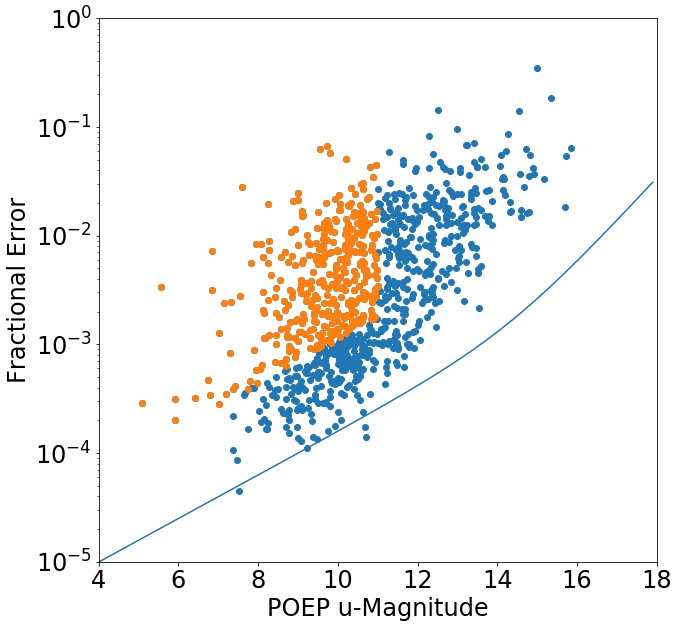

In [23]:
matplotlib.rcParams.update({'font.size': 24}) #adjust font
plt.figure(figsize=(10,10))
plt.axis([4.0,18.0,0.00001,1.0])

xplot=[]
yplot=[]
for mag in np.arange(4,18,0.1):
    meanf=np.power(10,(zmag-mag)/2.5)*medexptime
    shotnoise=np.sqrt(meanf*gain)/(meanf*gain)
    detectnoise=np.sqrt(np.pi*photap*photap)*(readnoise+0.2*medexptime+1.05*medexptime)/(meanf*gain)
    predictnoise=np.sqrt(shotnoise*shotnoise+detectnoise*detectnoise)/np.sqrt(150) #150 to get to 10-min bins
    xplot.append(mag)
    yplot.append(predictnoise)

xplot=np.array(xplot)
yplot=np.array(yplot)
plt.plot(xplot,yplot)
#plt.plot(xplot,yplot*7)

#ntoi=len(tmag)
#for i in range(ntoi):
    
plt.scatter(tmag,tdep/1.0e6)
plt.scatter(txplot,typlot)

plt.xlabel('POEP u-Magnitude')
plt.ylabel('Fractional Error')
#plt.legend(loc='upper left')
plt.yscale('log')
#plt.show()
plt.savefig("TESS.pdf")

In [14]:
sortidx=np.argsort(toiid)
for i in sortidx[:]:
    #if tdep[i] > 3000.0 and tdep[i] < 20000.0 and tmag[i] < 10 and toiid[i] != 129.01:
    meanf=np.power(10,(zmag-tmag[i])/2.5)*medexptime
    shotnoise=np.sqrt(meanf*gain)/(meanf*gain)
    detectnoise=np.sqrt(np.pi*photap*photap)*(readnoise+0.2*medexptime+1.05*medexptime)/(meanf*gain)
    predictnoise=np.sqrt(shotnoise*shotnoise+detectnoise*detectnoise)/np.sqrt(150)
    
    if tdep[i]/1.0e6 > 8.0 * predictnoise and tmag[i] < 11:
        print('TOI'+str(toiid[i]),',',ra[i],',',dec[i],',',tmag[i],',',tdur[i],',',tdep[i],',',t0[i],',',per[i])

TOI102.01 , 87.139956 , -63.988427 , 9.716 , 3.776425 , 13979.926188 , 2458326.078645 , 4.411943
TOI104.01 , 319.949611 , -58.148876 , 9.848 , 5.59014 , 3586.196984 , 2458327.673462 , 4.087445
TOI105.01 , 337.457199 , -48.003087 , 9.48 , 2.869426 , 11836.69122 , 2458326.50599 , 2.184659
TOI106.01 , 68.959732 , -64.02704 , 10.307 , 3.776111 , 7452.432687 , 2458326.745077 , 2.84938
TOI107.01 , 313.783108 , -34.135572 , 9.639 , 4.557506 , 12999.89718 , 2458328.29934 , 3.950054
TOI114.01 , 63.37389 , -69.226789 , 10.555 , 3.410191 , 7125.315013 , 2458327.520924 , 3.288776
TOI116.01 , 357.84526 , -70.152863 , 10.991 , 2.366459 , 16879.44984 , 2458326.689274 , 2.798594
TOI118.01 , 349.556843 , -56.903885 , 9.154 , 2.123832 , 1704.034261 , 2458329.199631 , 6.036061
TOI120.01 , 4.446408 , -66.358985 , 7.144 , 8.555958 , 2389.90616 , 2458332.082805 , 11.535076
TOI121.01 , 331.867232 , -41.815456 , 9.929 , 5.449073 , 14107.16966 , 2458336.139719 , 14.775056
TOI123.01 , 319.6994 , -26.616077 , 8.

TOI503.01 , 124.32041 , 12.601365 , 9.187 , 1.835655 , 3648.055302 , 2458492.053368 , 3.677469
TOI504.01 , 90.774153 , -52.08437 , 9.757 , 2.622396 , 3282.25479 , 2458491.724059 , 1.677303
TOI505.01 , 117.415037 , -52.120453 , 10.667 , 4.049481 , 11042.786131 , 2458494.135246 , 3.329371
TOI508.01 , 111.509536 , 7.61582 , 9.643 , 4.202993 , 10364.050547 , 2458494.135425 , 4.611884
TOI509.01 , 117.92497 , 9.386054 , 7.905 , 3.669772 , 891.412821 , 2458494.445731 , 18.119809
TOI523.01 , 84.846542 , -19.558202 , 9.579 , 2.981681 , 6044.13412 , 2458472.959693 , 9.91102
TOI527.01 , 101.188763 , -36.657378 , 8.236 , 2.523193 , 5554.374458 , 2458470.738689 , 18.089162
TOI550.01 , 55.031424 , 5.874627 , 9.002 , 3.255177 , 24779.049904 , 2458439.585605 , 13.249837
TOI550.02 , 55.031424 , 5.874627 , 9.002 , 3.099789 , 21393.227138 , 2458447.398548 , 10.043245
TOI554.01 , 60.747939 , 9.208501 , 6.414 , 3.287855 , 319.089351 , 2458442.619254 , 7.048602
TOI558.01 , 42.291485 , -58.024738 , 10.988 , 

TOI948.01 , 75.531703 , -22.711909 , 10.46 , 3.208 , 2482.58 , 2458442.13529 , 12.7009
TOI950.01 , 70.375077 , 14.815659 , 10.151 , 1.699 , 1816.32 , 2458439.35452 , 1.14288
TOI951.01 , 67.551169 , 5.29885 , 10.044 , 3.707 , 17064.8 , 2458441.2993 , 2.96845
TOI953.01 , 67.552308 , 5.298467 , 9.754 , 3.663 , 13028.0 , 2458441.29935 , 2.96844
TOI954.01 , 61.941081 , -25.208702 , 9.751 , 4.701 , 2045.15 , 2458411.90855 , 3.6847
TOI956.01 , 75.360727 , -22.382232 , 9.459 , 3.139 , 5962.04 , 2458445.26599 , 17.95473
TOI958.01 , 83.215859 , -19.575054 , 10.924 , 1.006 , 4384.72 , 2458438.54071 , 0.5884
TOI959.01 , 114.01246 , 4.715091 , 10.631 , 1.686 , 30644.8 , 2458492.69541 , 1.54104
TOI960.01 , 107.59813 , -5.432636 , 10.627 , 2.428 , 1872.29 , 2458491.79665 , 1.6221
TOI961.01 , 127.178386 , 4.038537 , 10.624 , 2.132 , 26891.1 , 2458496.16829 , 4.79586
TOI962.01 , 117.71258 , -21.015654 , 10.618 , 4.299 , 16580.3 , 2458493.35787 , 4.06269
TOI963.01 , 119.149294 , -0.772923 , 10.617 , 4.4